# Prolexitim NLP Analytics
## Predicting TAS-20 from subject text
### Using OpenAI API for embeddings and GPT-based approaches
<hr>

- Prolexitim normalized dataset version Jan23 (from Psicobotica citizen science forms).
- Dataset from Piscobotica Prolexitim TAS-20 Spain instrument and Prolexitim NLP.
- Updated Jan '23, including automated English translation of users' inputs. 

<hr>\n",
Raúl Arrabales Moreno - Updated 4th May 2023 (Psicobótica)<br>

- [conscious-robots.com](http://www.conscious-robots.com/)
- [psicobotica.com](http://www.psicobotica.com/en/)

<hr>

#### This notebook contains:\n",
- Prolexitim dataset loading and checking
- Obtaining OpenAI ADA Embeddings for Card1
- Visualize embeddings related to label Alexithymia
- Explore clustering based on the embeddings
- Visualize different number of clusters
- Name and explore clusters using OpenAI text-davinci-003



### Helper functions

In [10]:
def get_apikey_from_file(filename):
    """ Given a filename,
        return the contents of that file
    """
    try:
        with open(filename, 'r') as f:
            # It's assumed our file contains a single line,
            # with our API key
            return f.read().strip()
    except FileNotFoundError:
        print("'%s' file not found" % filename)

### Loading Prolexitim Dataset

In [36]:
import pandas as pd 
import numpy as np

prolexitim_dataset_path = "data/Prolexitim_Jan23_En.csv"
prolexitim_df = pd.read_csv(prolexitim_dataset_path,header=0,delimiter=",")

In [3]:
prolexitim_df.sample(5)

,Timestamp,TAS20,F1,F2,F3,Gender,Age,Code,Alexithymia,Timestamp (1),...,Depression,BAI,Anxiety,PSS,AN,AP,Text_Card1_en,Text_Card9VH_en,Text_Card11_en,Text_Card13HM_en
167,2021-03-02T15:18:19.781Z,77,31,21,25,2,31,20850840d662dd622d0954cc665ac1fa,POSITIVE,2021-03-02T15:23:36.144Z,...,UNKNOWN,NaN,UNKNOWN,NaN,NaN,NaN,... The boy doesn't want to play the violin,... The men on the battlefield are dead,...There is a vulture on a rocky cliff waiting...,... The man killed the woman unintentionally a...
908,2022-04-26T04:01:09.648Z,75,30,22,23,2,20,85440806db36c87d4e5ff39351a67702,POSITIVE,2022-04-26T04:10:36.656Z,...,POSITIVE,47.0,POSITIVE,34.0,NaN,NaN,"That is, without a doubt, the disappointed loo...",The day had been exhausting for all the worker...,The war is over and all that remains are the r...,Along with the night came the departure of the...
998,2022-11-06T04:05:15.752Z,77,29,20,28,2,18,6a554e43beb267376f3ee3c98df3d6e5,POSITIVE,2022-11-06T04:09:15.529Z,...,POSITIVE,41.0,POSITIVE,42.0,30.0,17.0,...\nA boy who was forced to study hard and pl...,...\nAn invasion of rats in which people had t...,"...\nA jungle, a bird on the edge of a cliff w...","...\nA married couple in the morning, the man ..."
694,2021-10-03T19:32:30.266Z,91,34,25,32,2,18,236a07c3853c6e68c9fc08e35f0cf179,POSITIVE,2021-10-03T19:47:40.631Z,...,POSITIVE,NaN,UNKNOWN,49.0,22.0,28.0,"...\na boy wanted to be a violinist, he always...","... a man was surrounded by his best friends, ...",...a bored girl from her family went to the mo...,"... a man, he thought he was in love, but he w..."
448,2021-05-17T07:07:57.660Z,71,22,24,25,2,20,20e00639682765451f9b709a9ebeb4f8,POSITIVE,2021-05-17T07:33:41.708Z,...,UNKNOWN,NaN,UNKNOWN,NaN,NaN,NaN,Once upon a time there was a boy who wanted to...,Many men in war enjoy a moment of peace sleepi...,The waterfall of the nymph where she had her h...,This man is cheating on his wife for a long ti...


In [4]:
prolexitim_df.columns

Index(['Timestamp', 'TAS20', 'F1', 'F2', 'F3', 'Gender', 'Age', 'Code',
       'Alexithymia', 'Timestamp (1)', 'DateDiff_TAS20_NLP', 'Text_Card1',
       'Text_Card9VH', 'Text_Card11', 'Text_Card13HM', 'Text_AllCards', 'PHQ9',
       'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'Depression',
       'BAI', 'Anxiety', 'PSS', 'AN', 'AP', 'Text_Card1_en', 'Text_Card9VH_en',
       'Text_Card11_en', 'Text_Card13HM_en'],
      dtype='object')

In [5]:
# Reduced dataset for alexithymia binary classification (Spanish)
alex_bin_es_df = prolexitim_df[['Code','Alexithymia',
                                'Text_Card1','Text_Card9VH', 
                                'Text_Card11', 'Text_Card13HM', 
                                'Text_AllCards']]

In [6]:
alex_bin_es_df.sample(5)

,Code,Alexithymia,Text_Card1,Text_Card9VH,Text_Card11,Text_Card13HM,Text_AllCards
971,66f49551884b2adcbe9d05e3738d8450,POSITIVE,... \nUn niño sentado en su banco de estudio....,... \nUn grupo de trabajadores aprovechando s...,... \nUn camino de tierra que te lleva a una ...,... \nUn hombre despidiendo a su esposa despu...,... \nUn niño sentado en su banco de estudio....
989,da8c3d15e1caab6a2f4aa4e4bdca9ad3,POSITIVE,... Un chico que tenía una pasión por el viol...,... \nUn grupo de hombres que eran amigos de ...,... Existió el camino que decían que quitaba ...,un hombre con problemas de ira estaba tratand...,... Un chico que tenía una pasión por el viol...
720,7c2d4a539b7d771671ef745f6558fa4c,POSITIVE,"Había una vez un niño que tenía un sueño, quer...","Un grupo de amigos ivivían en un pueblo, había...","\nNo logro distinguir nada de la imagen, así q...",Había un hombre que era muy borracho y mujerie...,"Había una vez un niño que tenía un sueño, quer..."
521,a5f4f654a0739ba30a1146b5b014a617,POSITIVE,... \nUn niño que estaba frustrado por no sab...,... \nUn soldado dormido junto a sus amigos d...,... \nUna cascada muy bonita,... \nUn hombre que estaba triste por haber a...,... \nUn niño que estaba frustrado por no sab...
613,e716902c617896d0126bca315905483b,POSITIVE,... \nerase una vez un niño que le gustaba mu...,... \nunos hombres que estaban exhaustos de t...,... no logró identificar para nada la imagen\n,... \nUn hombre tiene que ir a trabajar despu...,... \nerase una vez un niño que le gustaba mu...


In [9]:
# It's quite unbalanced (Let's keep it that way for the time being)
alex_bin_es_df.value_counts('Alexithymia')

Alexithymia
POSITIVE    781
NEGATIVE    230
Name: count, dtype: int64

### Build OpenAI Embeddings

In [15]:
# My OpenIA API Key
import openai
import os

os.environ["OPENAI_API_KEY"] = get_apikey_from_file('ram_openai_apikey.txt')

In [13]:
# Using the text-embedding-ada-002 model
# See: https://openai.com/blog/new-and-improved-embedding-model

def get_embedding(text, model="text-embedding-ada-002"):
   text = text.replace("\n", " ")
   return openai.Embedding.create(input = [text], model=model)['data'][0]['embedding']

In [26]:
# Delayed call to prevent this error:
# RateLimitError: Rate limit reached for default-global-with-image-limits in organization on requests per min. 
# Limit: 60 / min. Please try again in 1s. Contact us through our help center at help.openai.com if you continue to have issues. 
import time

def delayed_get_embedding(text, model, delay=1.0):
    time.sleep(delay)
    return get_embedding(text, model)

In [18]:
# Test the API
embed1 = get_embedding('Prueba de texto número uno')
embed1[0:5]

[-0.010036744177341461,
 -0.006101734936237335,
 -0.0021321496460586786,
 0.0005581457517109811,
 0.003024524310603738]

In [28]:
# Test the delayed API +call
embed2 = delayed_get_embedding('Prueba de texto número dos con retardo','text-embedding-ada-002', 0.1)
embed2[0:5]

[-0.03275999426841736,
 -0.013665752485394478,
 -0.009965736418962479,
 0.006113803945481777,
 0.004797192290425301]

In [31]:
# Adding the ADA embedding for Card1 text (one per second)
alex_bin_es_df['ada_card1'] = alex_bin_es_df['Text_Card1'].apply(lambda x: delayed_get_embedding(x, model='text-embedding-ada-002',delay=1.0))

/tmp/ipykernel_22351/3072694236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alex_bin_es_df['ada_card1'] = alex_bin_es_df['Text_Card1'].apply(lambda x: delayed_get_embedding(x, model='text-embedding-ada-002',delay=1.0))


In [32]:
alex_bin_es_df.sample(5)

,Code,Alexithymia,Text_Card1,Text_Card9VH,Text_Card11,Text_Card13HM,Text_AllCards,ada_card1
68,1e72525d8fb4f267c045e14d55640ad4,POSITIVE,Erase una vez un niño que odiaba ir a clases d...,"Había sido una dura jornada de trabajo, más in...",Aprovechó los túneles de una antigua mina aban...,"No quería irse todavía, pero llegaba tarde al ...",Erase una vez un niño que odiaba ir a clases d...,"[-0.010896380990743637, 0.0089723477140069, 0...."
830,950b4cc4250f382566f349f11baac775,POSITIVE,Se durmió del aburrimiento porque su juguete o...,Un tipo se rindió acerca de la vida así que ya...,Es un bosque abandonado porque era raro y no t...,Un tipo mata a su esposa mientras estaba enfer...,Se durmió del aburrimiento porque su juguete o...,"[-0.019900325685739517, -0.004587495233863592,..."
594,61419c2148689318e050711b3239a679,POSITIVE,... \nun niño que estaba en su casa estudiand...,... \nunos hombres que estaban bebiendo y se ...,... \nunas personas que estaban migrando de s...,... \nun hombre que llegaba a su casa cansado...,... \nun niño que estaba en su casa estudiand...,"[-0.022362470626831055, 0.011275142431259155, ..."
565,55814527e81fba16e0f5c4f2e2e43c53,POSITIVE,That child is feeling sad because he doesn't k...,Everyone is just lazy............................,i dont understand this picture...................,The man had sex with the lady and then killed ...,That child is feeling sad because he doesn't k...,"[-0.0062584769912064075, 0.007839887402951717,..."
989,da8c3d15e1caab6a2f4aa4e4bdca9ad3,POSITIVE,... Un chico que tenía una pasión por el viol...,... \nUn grupo de hombres que eran amigos de ...,... Existió el camino que decían que quitaba ...,un hombre con problemas de ira estaba tratand...,... Un chico que tenía una pasión por el viol...,"[-0.04239550977945328, 0.005835925228893757, 0..."


In [33]:
# Save to file
alex_bin_es_df.to_csv('output/alex_bin_es_ada.csv', index=False)

In [37]:
# Read it back to mem:
embeds_df = pd.read_csv('output/alex_bin_es_ada.csv')
embeds_df['ada_card1'] = embeds_df.ada_card1.apply(eval).apply(np.array)

In [38]:
embeds_df.sample(5)

,Code,Alexithymia,Text_Card1,Text_Card9VH,Text_Card11,Text_Card13HM,Text_AllCards,ada_card1
780,fe9e6c51a836d1a7e0f276e9baf1174c,POSITIVE,un niño estresado por algo que sentía que no...,"varios hombres aburridos de su rutina, sin n...","un acantilado, muy peligroso, pero en el que...","un chico, el cual se sentía insuficiente por...",un niño estresado por algo que sentía que no...,"[-0.03383832052350044, 0.0004078377387486398, ..."
483,8dec5f595dd7acd55350a16aa11b105d,POSITIVE,"... un niño con un talento brillante, era muy...","... unos campesinos que vivían juntos, todas ...","... un jarrón de oro, el jarrón era de los in...","... un hombre muy trabajador, con un puesto e...","... un niño con un talento brillante, era muy...","[-0.03478597104549408, 0.005945428274571896, 0..."
667,a23f68fa91b47c75921d052084ea0b78,POSITIVE,Erase una vez Un niño que sufria mucho por sus...,Erase una vez... un hombre quetrabajaba en un ...,... \nUn paisaje hermoso pero los humanos lo ...,... \nUn señor asesino a su esposa o murio po...,Erase una vez Un niño que sufria mucho por sus...,"[-0.007756105624139309, 0.008834250271320343, ..."
25,42de991d2161773b17e4666e49b5b197,POSITIVE,... un niño que miraba al violín y no sabia s...,... unos hombres que intentaban dormir al ca...,... unos hombres o mujeres que entraron dentr...,... un hombre y una mujer que han terminado d...,... un niño que miraba al violín y no sabia s...,"[-0.025949135422706604, -0.003094201674684882,..."
784,c8b2c7cdec9d114f9d6d362cc105b6d7,POSITIVE,... un niño que aprendía a tocar el violín. L...,... un grupo de trabajadores que en sus ratos...,...un grupo de aves observan desde una murall...,"...un hombre sufriendo, tal vez arrepentido d...",... un niño que aprendía a tocar el violín. L...,"[-0.027157096192240715, -0.0007798384176567197..."


### Embedding visualization in 2D (t-SNE)

In [49]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib

# Load the embeddings
embeds_df = pd.read_csv('output/alex_bin_es_ada.csv')

# Convert to a list of lists of floats
matrix = np.array(embeds_df.ada_card1.apply(eval).to_list())

Text(0.5, 1.0, 'Alexithymic language visualized in language using t-SNE')

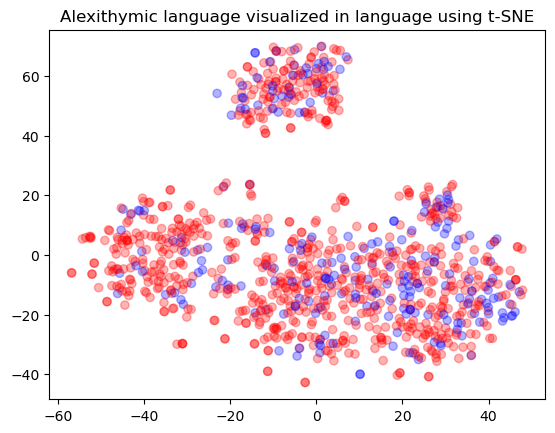

In [50]:
# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)

colors = {'POSITIVE':'red', 'NEGATIVE':'blue'}
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]
color_indices = embeds_df['Alexithymia'].apply(lambda x: colors[x])

plt.scatter(x, y, c=color_indices, alpha=0.3)
plt.title("Alexithymic language visualized in language using t-SNE")

As happened with other embedding approaches, there isn't a clear separation between positive and negative alexithymia. However, it looks like we have three different clusters here. It'd be interesting to find out what pattern causes this separation in three grupusculs. 

### Clustering

In [59]:
# Let's recover the other labels before clustering, to check for correlations
labels_and_embeds_df = prolexitim_df.merge(embeds_df)

In [63]:
labels_and_embeds_df.head()

,Timestamp,TAS20,F1,F2,F3,Gender,Age,Code,Alexithymia,Timestamp (1),...,BAI,Anxiety,PSS,AN,AP,Text_Card1_en,Text_Card9VH_en,Text_Card11_en,Text_Card13HM_en,ada_card1
0,2020-06-15T14:35:58.952Z,36,13,8,15,2,50,9048b371b816a38101aa18572090de8c,NEGATIVE,2020-06-15T14:28:25.641Z,...,NaN,UNKNOWN,NaN,NaN,NaN,"Rodrigo, a boy whose parents forced him to stu...","... a group of seasonal workers who, after a l...",... a world inhabited by the strangest animals...,"... A man so dedicated to his work, that he wa...","[-0.008384497836232185, 0.006449613720178604, ..."
1,2020-06-16T15:53:01.414Z,60,27,17,16,2,51,4d40ba4a4b5f87b88ce4ea5c5e226007,NEGATIVE,2020-06-16T16:02:48.020Z,...,NaN,UNKNOWN,NaN,NaN,NaN,a child who wanted to play the violin but his ...,some men who always had dreams and took advant...,a cobbled path where everyone who passed slipp...,"a man in love who, after a frantic night of se...","[-0.017311980947852135, 0.0037717223167419434,..."
2,2020-06-17T12:57:23.074Z,37,16,10,11,1,53,662e3b511b407d83fcc6e41adb79829d,NEGATIVE,2020-06-17T12:54:25.485Z,...,NaN,UNKNOWN,NaN,NaN,NaN,"... a child who watched as the violin, placed ...","... one torrid summer afternoon, men, after a ...","... an impenetrable mountain, lost and inexplo...","... repentance, sated the body's appetite, con...","[-0.017151271924376488, -0.01824740692973137, ..."
3,2020-06-17T23:45:12.244Z,48,14,13,21,1,43,b31c06a8f15da58b30b5198ca52c59ab,NEGATIVE,2020-06-17T23:42:16.710Z,...,NaN,UNKNOWN,NaN,NaN,NaN,a boy who wanted with all his might to play th...,a gang of cowboys that roamed the Arizona plai...,a powerful army camped next to an irreducible ...,"a weak, hesitant and sad man, who decided to g...","[-0.006118627265095711, 0.0007265054737217724,..."
4,2020-06-18T01:22:37.813Z,49,18,13,18,1,50,2ae0c1219a6d2e35dca2f72ef7bc11c3,NEGATIVE,2020-06-18T01:18:04.309Z,...,NaN,UNKNOWN,NaN,NaN,NaN,"... a child who, having more facility for musi...","... a boy who wanted to work and drop out, des...","... on a summer day, specifically August 10, a...",... a government minister who had an affair wi...,"[-0.012190859764814377, -0.002016377169638872,..."


In [68]:
# Let's use KMeans for clustering
from sklearn.cluster import KMeans

# np.array(embeds_df.ada_card1.apply(eval).to_list())
matrix = np.vstack(labels_and_embeds_df.ada_card1.apply(eval).to_list())
matrix.shape

(1139, 1536)

In [162]:
# Explore from 2 to 6 clusters:
for n_clusters in range(2,7):
    kmeans = KMeans(n_clusters = n_clusters, init='k-means++', n_init='auto', random_state=42)
    kmeans.fit(matrix)
    labels_and_embeds_df['clustering_' + str(n_clusters)] = kmeans.labels_

In [164]:
labels_and_embeds_df.sample(4)

,Timestamp,TAS20,F1,F2,F3,Gender,Age,Code,Alexithymia,Timestamp (1),...,Text_Card9VH_en,Text_Card11_en,Text_Card13HM_en,ada_card1,cluster_ada_card1,clustering_2,clustering_3,clustering_4,clustering_5,clustering_6
869,2021-12-04T23:41:04.798Z,58,16,20,22,2,18,fa27abdde5d4cb0f15230bbe4faa510b,NEGATIVE,2021-12-05T00:09:01.167Z,...,"...\na group of soldiers prepared for war, one...",...\na child with a boring and meaningless lif...,...\nan already adult married man but honestly...,"[-0.025755418464541435, 0.0024365829303860664,...",3,0,1,3,3,3
1009,2022-03-19T01:45:42.870Z,84,33,23,28,2,25,c91e98c270460932b271f0f528cd1073,POSITIVE,2022-03-19T02:22:44.876Z,...,...\nA group of researchers has been found in ...,...\nThe secret of the map was discovered by a...,"One night, only one night, he left, he just wa...","[-0.04042232036590576, 0.00922461412847042, 0....",0,0,1,0,0,0
570,2021-05-28T21:24:09.819Z,51,12,19,20,2,23,26cf78d8ce89119796b593ad8ea8d51b,NEGATIVE,2021-05-28T21:29:55.979Z,...,...\nSome tired men after a hard day's work in...,...\nA queen bee fighting a dragon.,"...\nA man accidentally kills his lover, and h...","[-0.023615527898073196, 0.00998577568680048, 0...",0,0,1,0,0,0
819,2021-10-15T02:02:27.190Z,68,27,13,28,2,19,459777225dfd75f8029973c6bb30fc2b,POSITIVE,2021-10-15T02:36:55.159Z,...,A civil war that ended with many men dead on t...,People used to have to escape their cities tha...,"He couldn't contain his crying, seeing his wif...","[-0.009068196639418602, 0.004839248023927212, ...",3,0,1,3,3,3


In [132]:
# how many exemplars per cluster?
labels_and_embeds_df.cluster_ada_card1.value_counts()

cluster_ada_card1
3    391
0    280
1    270
2    198
Name: count, dtype: int64

In [165]:
# Save to file
labels_and_embeds_df.to_csv('output/labels_and_clusters2_6_df.csv', index=False)

In [135]:
# Clusters have no significant difference in alexithymia
labels_and_embeds_df.groupby("cluster_ada_card1").TAS20.mean().sort_values()

cluster_ada_card1
3    65.005115
2    68.813131
0    69.046429
1    70.233333
Name: TAS20, dtype: float64

In [136]:
# Do clusters have any significant difference in depression?
labels_and_embeds_df.groupby("cluster_ada_card1").PHQ9.mean().sort_values()

cluster_ada_card1
0    16.923077
3    17.042105
1    17.352564
2    17.441176
Name: PHQ9, dtype: float64

In [137]:
# Do clusters have any significant difference in anxiety?
labels_and_embeds_df.groupby("cluster_ada_card1").BAI.mean().sort_values()

cluster_ada_card1
0    28.877778
3    29.115183
1    31.245033
2    31.794118
Name: BAI, dtype: float64

In [138]:
# Do clusters have any significant difference in stress?
labels_and_embeds_df.groupby("cluster_ada_card1").PSS.mean().sort_values()

cluster_ada_card1
3    37.132911
2    37.500000
0    37.814286
1    38.756522
Name: PSS, dtype: float64

In [139]:
# Do clusters have any significant difference in negative affect?
labels_and_embeds_df.groupby("cluster_ada_card1").AN.mean().sort_values()

cluster_ada_card1
0    27.941176
2    30.222222
1    30.291139
3    31.093923
Name: AN, dtype: float64

In [140]:
# Do clusters have any significant difference in postive affect?
labels_and_embeds_df.groupby("cluster_ada_card1").AP.mean().sort_values()

cluster_ada_card1
1    22.474684
0    23.184874
3    23.198895
2    24.244444
Name: AP, dtype: float64

### Visualizing clusters

In [178]:
# Visualizing clusters 
def viz_clusters(n_clusters):
    tsne = TSNE(n_components=2, perplexity=15, random_state=42, init="random", learning_rate=200)
    vis_dims2 = tsne.fit_transform(matrix)

    x = [x for x, y in vis_dims2]
    y = [y for x, y in vis_dims2]
    
    if n_clusters < 7:
        colors = ["purple", "green", "red", "blue", "yellow", "brown"]
    else:
        print('Error: too many clusters.')
        return

    for category, color in enumerate(colors[0:n_clusters]):
        xs = np.array(x)[labels_and_embeds_df['clustering_' + str(n_clusters)] == category]
        ys = np.array(y)[labels_and_embeds_df['clustering_' + str(n_clusters)] == category]
        plt.scatter(xs, ys, color=color, alpha=0.3)

        avg_x = xs.mean()
        avg_y = ys.mean()

        plt.scatter(avg_x, avg_y, marker='x', color=color, s=100)
        plt.annotate('Cluster ' + str(category), (avg_x, avg_y))
    plt.title(str(n_clusters) + " Clusters identified visualized in language 2d using t-SNE")

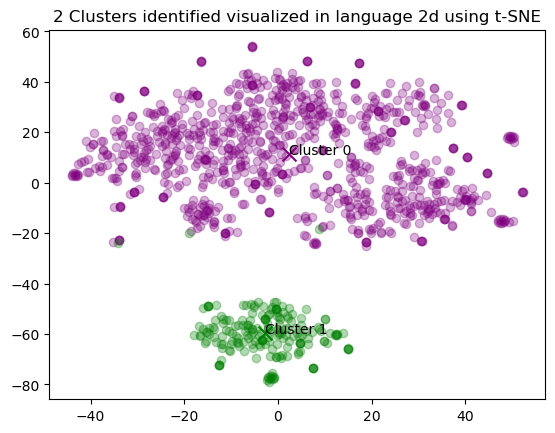

In [179]:
# Visualize all cluster models
viz_clusters(2)

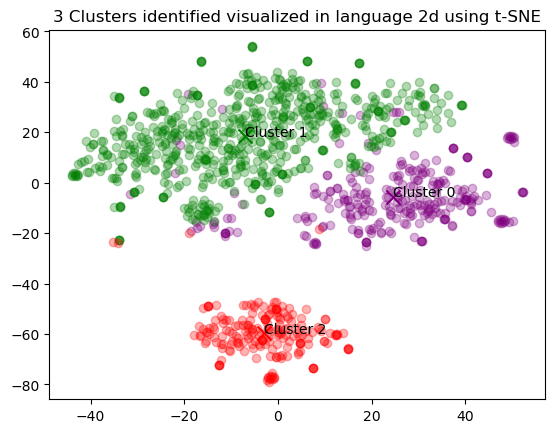

In [180]:
viz_clusters(3)

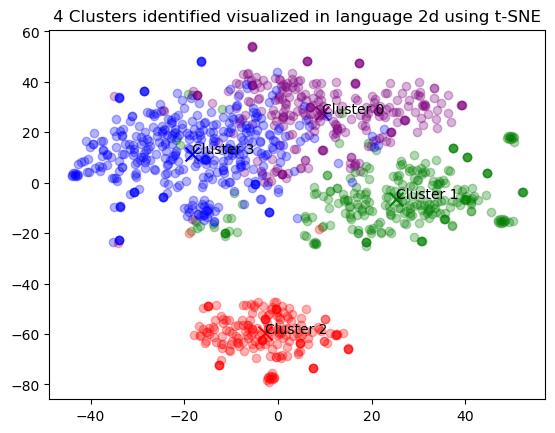

In [181]:
viz_clusters(4)

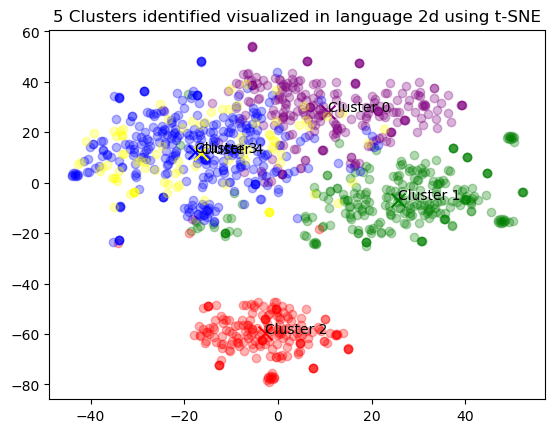

In [182]:
viz_clusters(5)

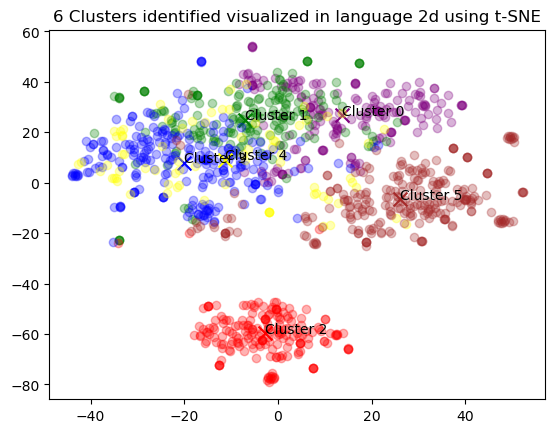

In [183]:
viz_clusters(6)

### Exploring Clusters

Looks like n=4 is a good number of clusters for this experiment (best separation in 2D projection)

In [186]:
for col in labels_and_embeds_df.columns: 
    if 'cluster' in col: 
        print(col)

cluster_ada_card1
clustering_2
clustering_3
clustering_4
clustering_5
clustering_6


In [187]:
labels_and_embeds_df.clustering_4.value_counts()

clustering_4
3    391
0    280
1    270
2    198
Name: count, dtype: int64

In [189]:
# Explore random samples from each cluster (from clustering n=4). 
for i in range(4):
    print("Cluster " + str(i) + " samples:\n------------------")
    
    for cluster_texts in labels_and_embeds_df[labels_and_embeds_df.clustering_4 == i].Text_Card1.sample(4, random_state=42):
        sample = cluster_texts.replace("\n"," ").replace("...", "").replace("  ", " ")
        print(sample)
    print()

Cluster 0 samples:
------------------
  Un niño que le obligaban a tocar el violín y él le aburría más de la cuenta
  un niño triste que no podia tocar el violin
 Un niño que queria tocar el violin 
 Un niño el cuál estaba cansado de practicar el violín, él solo quería salir a jugar como los demás niños de su edad. 

Cluster 1 samples:
------------------
  Un niño llamado Jun , este pequeño niño era el más feliz , dulce , amable , sonriente , positivo hasta que un día las personas que más le importaba empezaron a dañarlo haciéndolo sentir como solo sirviente y no como parte de la familia , cuando visitaba a su tía y abuela esperaba ser con todo su ser querido como es , pero su tía y sus hermanos se unían juntos y todo su pasado lo repetían una y otra vez haciendo odiar lo que hacía en el pasado y haciéndolo sentir peor de lo que ya sentía acudía a su otra tía la cual también le recordaba el pasado sabiendo que las cosas cambian con el paso del tiempo , sus familiares paternos podrían h

### Identifying and naming clusters

In [ ]:
# Explore random samples from each cluster. 
# Then use text-davinci-003 to name the clusters, based on a random sample of 5 reviews from that cluster.

In [155]:
# Explore a sample of each cluster
for i in range(n_clusters):
    print("Cluster " + str(i) + " samples:\n------------------")
    
    for cluster_texts in labels_and_embeds_df[labels_and_embeds_df.cluster_ada_card1 == i].Text_Card1.sample(4, random_state=42):
        sample = cluster_texts.replace("\n"," ").replace("...", "").replace("  ", " ")
        print(sample)
    

Cluster 0 samples:
------------------
  Un niño que le obligaban a tocar el violín y él le aburría más de la cuenta
  un niño triste que no podia tocar el violin
 Un niño que queria tocar el violin 
 Un niño el cuál estaba cansado de practicar el violín, él solo quería salir a jugar como los demás niños de su edad. 
Cluster 1 samples:
------------------
  Un niño llamado Jun , este pequeño niño era el más feliz , dulce , amable , sonriente , positivo hasta que un día las personas que más le importaba empezaron a dañarlo haciéndolo sentir como solo sirviente y no como parte de la familia , cuando visitaba a su tía y abuela esperaba ser con todo su ser querido como es , pero su tía y sus hermanos se unían juntos y todo su pasado lo repetían una y otra vez haciendo odiar lo que hacía en el pasado y haciéndolo sentir peor de lo que ya sentía acudía a su otra tía la cual también le recordaba el pasado sabiendo que las cosas cambian con el paso del tiempo , sus familiares paternos podrían ha

In [130]:
# Prepare a prompt
prompt = f'What do the following customer reviews have in common?\n\nCustomer reviews:\n"""\n{texts}\n"""\n\nTheme:'
print(prompt)

What do the following customer reviews have in common?

Customer reviews:
"""
  Their was a child named Harry he was highly intelligent but does not want to play violin One day, he was on his chair looking at his violin thinking about how to convince his patents for closing his violin classes. He Made a plan that he will give some work to his parents by saying this "If you both did this both work, I will never demand or complain for anything" He exchange his parental professions but he fails..Now he is planning another plan
the boy is confused and sad looks like he's disappointed about his violin maybe he's unable to play on it, and that's makes him feel like a loser he's bored and in pain.
  This boy is sitting by a violin. He looks like he is thinking about something.
The youngster is bored, tired of the mundane, likely losing hope to ever be stimulated in life. It is heart wrenching because of how accurate it is to today's society. 
"""

Theme:


In [ ]:
# Reading a review which belong to each group.
rev_per_cluster = 10

for i in range(n_clusters):
    print(f"Cluster {i} Theme:", end=" ")

    texts = "\n".join(
        labels_and_embeds_df[labels_and_embeds_df.cluster_ada_card1 == i]
        .combined.sample(rev_per_cluster, random_state=42)
        .values
    )
    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=f'What do the following narratives have in common?\n\nNarratives:\n"""\n{reviews}\n"""\n\nTheme:',
        temperature=0,
        max_tokens=64,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0,
    )
    print(response["choices"][0]["text"].replace("\n", ""))

    sample_cluster_rows = df[df.Cluster == i].sample(rev_per_cluster, random_state=42)
    for j in range(rev_per_cluster):
        print(sample_cluster_rows.Score.values[j], end=", ")
        print(sample_cluster_rows.Summary.values[j], end=":   ")
        print(sample_cluster_rows.Text.str[:70].values[j])

    print("-" * 100)